In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style='darkgrid')

In [63]:
# data files
crashes = pd.read_csv('Crash_Data.csv', low_memory=False)
df=df_crashes
df_crashes.head()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,9,2021,Sunday,0:30,Single,NaN,NaN,NaN,...,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,...,28,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,NaN,...,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,NaN,...,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,5:15,Single,NaN,NaN,NaN,...,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night


In [57]:
# Labels for the sections of our pie chart
labels = ["Vic", "NSW", "SA", "QLD", "ACT", "NT", "WA"]

# The values of each section of the pie chart
sizes = [220, 95, 80, 100, 120, 110, 200]


colors = ["red", "orange", "lightcoral", "lightskyblue", "grey", "plum", "palegreen"]


explode = (0.1, 0, 0, 0, 0, 0, 0)

([<matplotlib.patches.Wedge at 0x218c3318df0>,
 [Text(0.26607898057334545, -1.170129042497899, 'Vic'),
  Text(1.057958069500526, -0.3012054501145695, 'NSW'),
  Text(1.0451959276725038, 0.34287821858032125, 'SA'),
  Text(0.6590921482573314, 0.8806801576653899, 'QLD'),
  Text(-0.11498131983694207, 1.093974083828568, 'ACT'),
  Text(-0.8519139889000915, 0.6958753879225326, 'NT'),
  Text(-1.026379577366586, -0.39565763377545005, 'WA')],
 [Text(0.15521273866778484, -0.6825752747904409, '23.8%'),
  Text(0.5770680379093778, -0.16429388188067426, '10.3%'),
  Text(0.5701068696395474, 0.18702448286199339, '8.6%'),
  Text(0.35950480814036256, 0.4803709950902126, '10.8%'),
  Text(-0.06271708354742293, 0.5967131366337644, '13.0%'),
  Text(-0.464680357581868, 0.37956839341229043, '11.9%'),
  Text(-0.5598434058363196, -0.2158132547866091, '21.6%')])

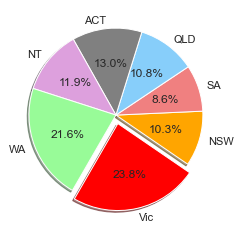

In [58]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=240)

In [83]:
Age = [18, 25, 52, 30, 40, 50, 60]
x_axis = np.arange(len(Age))

<BarContainer object of 7 artists>

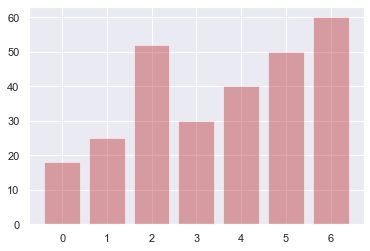

In [84]:
plt.bar(x_axis, Age, color='r', alpha=0.5, align="center")

([<matplotlib.axis.XTick at 0x218c33bebb0>,
 [Text(0, 0, 'Vic'),
  Text(1, 0, 'NSW'),
  Text(2, 0, 'SA'),
  Text(3, 0, 'QLD'),
  Text(4, 0, 'ACT'),
  Text(5, 0, 'NT'),
  Text(6, 0, 'WA')])

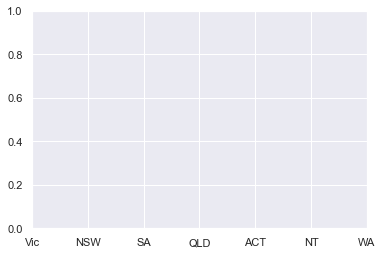

In [72]:
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Vic", "NSW", "SA", "QLD", "ACT", "NT", "WA"])

In [91]:

df_crashes.groupby('Crash Type')['Heavy Rigid Truck Involvement'].apply(lambda x: x.value_counts().head(1)).reset_index(name='COUNT').rename(columns={'level_1': 'Heavy Rigid Truck Involvement'})

,Crash Type,Heavy Rigid Truck Involvement,COUNT
0,Multiple,No,13207
1,Single,No,17528


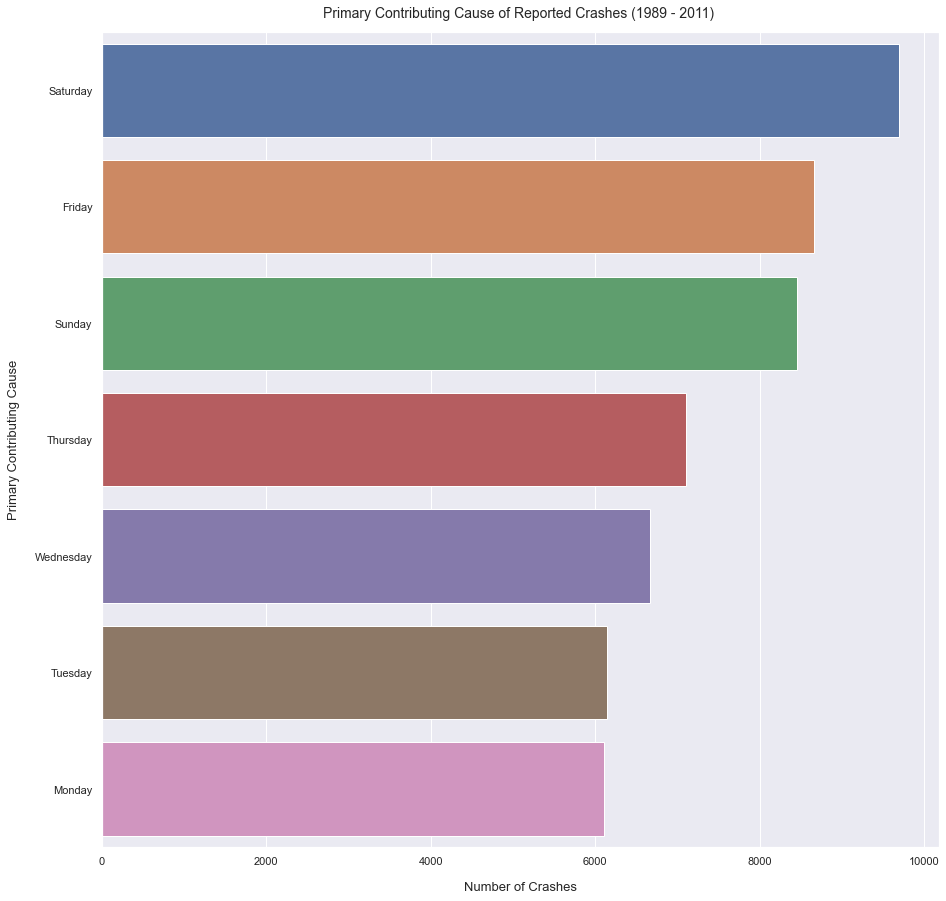

In [93]:
plt.figure(figsize=(15, 15))
sns.countplot(data=df_crashes,  y='Dayweek', order = df_crashes['Dayweek'].value_counts().index)
plt.title('Primary Contributing Cause of Reported Crashes (1989 - 2011) ', y=1.01, fontsize=14)
plt.xlabel('Number of Crashes', fontsize=13, labelpad=15)
plt.ylabel('Primary Contributing Cause', fontsize=13, labelpad=15)
plt.show();

In [100]:
crashes.describe()

,Crash ID,Month,Year,Age
count,5.284300e+04,52843.000000,52843.000000,52843.000000
mean,2.003021e+07,6.568685,2002.729974,39.662377
std,9.383542e+04,3.457347,9.378570,21.806198
min,1.989100e+07,1.000000,1989.000000,-9.000000
25%,1.995111e+07,4.000000,1995.000000,22.000000
50%,2.002144e+07,7.000000,2002.000000,34.000000
75%,2.010408e+07,10.000000,2010.000000,55.000000
max,2.021801e+07,12.000000,2021.000000,101.000000


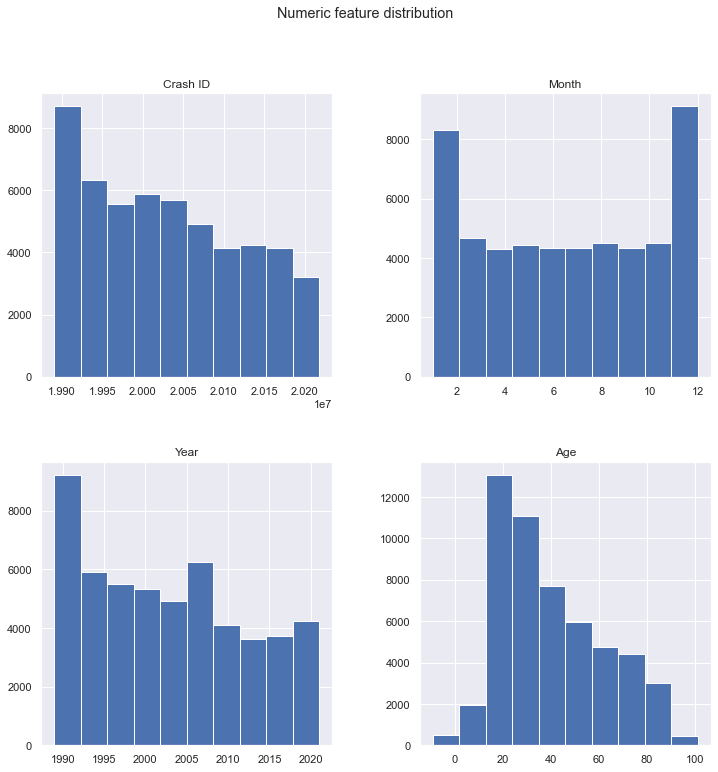

In [103]:
crashes.hist(figsize=[12,12])
plt.suptitle("Numeric feature distribution")
plt.show()